# District Heating: An Investigation into the Efficiency of a Centralized Heating System
#### Thermodynamics, Final Project  |  Karen Hinh, Mads Young
District heating is a method of home climate control that should be more utilized in the future due to its energy efficiency and friendliness to more sustainable energy sources. For heat sources, there’s geothermal or water source heat pumps, as well as gas or electric boilers, but for the purposes of this project, we are going to focus on exploring the differences between water source heat pumps and gas / electric boilers.

In this project, we will investigate the efficiencies of a small scale district heating network with different heat sources (water source heat pumps and gas / electric boilers) and mediums of heat transfer (liquid water vs steam). If there’s extra time, we would be interested in exploring the efficiency difference between small scale district heating with decentralized heating in houses. 

To accomplish this, we will build a thermodynamic model of a small scale district heating network with variables such as the amount of heat put in, the initial and final (after heat extraction) temperature of the fluid and pressure differences within the heat pump. We will use the model to compare energy cost, thermodynamic properties, and efficiency of the relevant heating methods to ideally prove the superiority of district heating networks over decentralized heating. This will be done in coolprop.

In [2]:
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP
import numpy as np
import matplotlib.pyplot as plt

# Simplified Model

![](final_system_diagram.png)

## Defining State Variables

In [3]:
# source: https://www.achrnews.com/articles/92875-the-essentials-of-working-with-r-410a#:~:text=A%20normally%20operating%20R%2D410A,side%20pressure%20of%20130%20psig.

T1 = 2 + 273.15 # K
T2 = 48.88 + 273.15 # K
T3 = 30 + 273.15 # K
T4 = T1

P1 = 896 * 1000 # Pa
P2 = 2882 * 1000 # Pa
P3 = 200 *1000 # Pa
P4 = 700 *1000 # Pa

# source: source: https://www.iosrjournals.org/iosr-jmce/papers/RDME-Volume4/RDME-34.pdf

m = np.array([32,44]) / 3600 # kg/s, varied

In [4]:
substance = 'R410a'

# Enthalpy calculations
h1 = CP.PropsSI('H', 'T',T1, 'P',P1, substance) # vapor, J/kg
h2 = CP.PropsSI('H', 'T',T2, 'P',P2, substance) # vapor, J/kg
h3 = CP.PropsSI('H', 'T',T3, 'P',P3, substance) # liquid, J/kg
h4 = 213.2942 * 1000 # vapor-liquid, J/kg

print(h1, h2, h3, h4,)

203047.24939138844 426390.5301947168 462422.6793225789 213294.19999999998


In [5]:
# m = 6.8 # kg, of water
# c = 1.8 # J/kg-C, of water
# deltaT = np.array([5,10]) / 3600 # J, temperature difference between water and refrigerant

# T1 = 12.8 + 273.15 # K
# T2 = 70 + 273.15 # K
# T3 = 60 + 273.15 # K
# T4 = 12.8 + 273.15 # K
# ##T5 = T1
# ##T6 = T1

In [6]:
# substance = 'R410a'

# # Enthalpy calculations
# h1 = CP.PropsSI('H', 'T',T1, 'Q',1, substance) / 1000 # vapor, kJ/kg
# h2 = CP.PropsSI('H', 'T',T2, 'Q',1, substance) / 1000 # vapor, kJ/kg
# h3 = CP.PropsSI('H', 'T',T3, 'Q',0, substance) / 1000 # liquid, 251.13 kJ/kg
# h4 = 205.6184 # vapor-liquid, kJ/kg

# print(h1, h2, h3, h4,)

In [7]:
# Calculate mass fraction
# mg # mass of vapor
# mf # mass of liquid
# x = mg / (mg + mf)

## Q56: Heat Transfer into the Evaporator (Qc)

In [8]:
# Q41 = m*c*deltaT # W
Q41 = m * (h1 - h4) # W

Q41

array([ -91.08400541, -125.24050744])

In [9]:
# m_flowrate = Q41 / (h1 - h4) # kg/s

# m_flowrate

## Q23: Heat Transfer out of the Condensor (Qh)

In [10]:
Q23 = m * (h2 - h3) # W

Q23

array([-320.28577003, -440.39293378])

## W12: Work into Compressor (Win)

In [11]:
W12 = m * (h1 - h2) # W

print('The work input to this heat pump ranges from: ' + str(-W12[0]) + ' W to ' + str(-W12[1]) + ' W')

The work input to this heat pump ranges from: 1985.2736071406966 W to 2729.751209818458 W


## COP

In [12]:
COP = Q23 / W12 # Qh/Win

print('The COP of this heat pump cycle is: ' + str(COP[0]))

The COP of this heat pump cycle is: 0.1613307953490271


## Heat Exchanger
Sources:
- https://www.engineeringtoolbox.com/arithmetic-logarithmic-mean-temperature-d_436.html
- https://www.engineeringtoolbox.com/overall-heat-transfer-coefficient-d_434.html
- https://www.engineeringtoolbox.com/heat-transfer-coefficients-exchangers-d_450.html
- https://www.pdhonline.com/courses/m371/m371content.pdf

In [70]:
h = 400 # W/m2-K, cooling of water by air --> compare to stainless steel / wall thickness (thermal conductivity)
A = 1 # m2, random assumption

LMT = -Q23 / (h*A) # K

print('The change in temp over time ranges from: ' + str(LMT[0]) + ' K to ' + str(LMT[1]) + ' K.')
# typical range: 1-10 K for LMT

The change in temp over time ranges from: 0.8007144250636015 K to 1.100982334462452 K.


In [71]:
# Houses
hot_temp = 70 # C

dT_h1 = -20 # C
dT_h2 = -30 # C
dT_h3 = -40 # C

T1 = hot_temp + dT_h1
T2 = hot_temp + dT_h2
T3 = hot_temp + dT_h3

r_pipe = 0.04 # m
h_pipe = 30 # m

v_water = 3.1415 * r_pipe**2 * h_pipe # m3
rho = 997 # kg/m3
m = v_water * rho

cold_temp = (m*T1 + m*T2 + m*T3) / (3*m) # C

cold_temp

dT_loop = hot_temp - cold_temp

print(hot_temp, cold_temp, dT_loop)

70 40.0 30.0


In [85]:
# LMTD

dT_loop = np.array([10.1, 15]) # C

tpi = T2 # K primary inlet temp, hot
tpo = T3 # K primary outlet temp, cold
tso = 10 + 273.15 # K secondary outlet temp, hot
tsi = tso-dT_loop # K secondary inlet temp, cold

# For counter flow:
dt_i = tpi - tso # inlet primary and outlet secondary fluid temp difference
dt_o = tpo - tsi # outlet primary and inlet secondary fluid temp difference

LMT = (dt_o - dt_i) / (np.log(dt_o / dt_i))

LMT

array([-243.09999657, -240.64134264])

## Plot

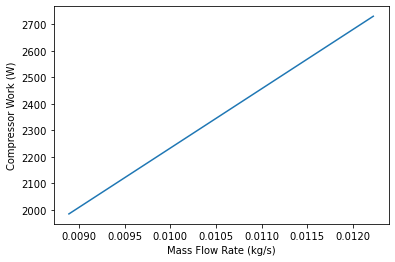

In [49]:
plt.plot(m,-W12)
plt.xlabel("Mass Flow Rate (kg/s)")
plt.ylabel("Compressor Work (W)")
plt.show()